## 単純なCNNモデルの作成

もしも```ModuleNotFoundError: No module named 'keras'```
といったエラーが出力された場合は
```!pip install keras```
を実行してanacondaにkerasをインストールしてください。

In [10]:
import pandas as pd
import os
base_dir = "mini_pictures"
train_dir = os.path.join(base_dir,"train")
valid_dir = os.path.join(base_dir,"valid")
test_dir = os.path.join(base_dir,"test")
mini_metadata = pd.read_csv('mini_metadata.csv',index_col=0)
classes = list(mini_metadata["make_model"].value_counts().index)
classes = sorted(classes)
classes_num = len(mini_metadata.groupby("make_model"))
print(classes)
print(classes_num)
IMAGE_SIZE = 256
BATCH_SIZE = 32
pictures_files = os.listdir(train_dir)
NUM_TRAINING = 0
NUM_VALIDATION = 0
for i in range(classes_num):
    NUM_TRAINING += len(os.listdir(os.path.join(train_dir, pictures_files[i])))
    NUM_VALIDATION += len(os.listdir(os.path.join(valid_dir, pictures_files[i])))
# mini_metadata.groupby("make_model").nunique()

['Audi-a3', 'Audi-a5', 'Audi-q5', 'BMW-1-series', 'BMW-4-series', 'BMW-x3', 'Honda-pilot', 'Jeep-wrangler', 'MINI-clubman', 'MINI-countryman', 'Mazda-mazda5', 'Mercedes-Benz-gla', 'Mercedes-Benz-glk', 'Mitsubishi-outlander', 'Nissan-370z', 'Nissan-quest', 'Nissan-rogue-select', 'Subaru-outback', 'Toyota-tacoma', 'Volkswagen-cc']
20


In [11]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(classes_num, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 128)      

### モデルのコンパイル

In [13]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

### ImageDataGeneratorを使ってディレクトリから画像を読み込む

In [14]:
from keras.preprocessing.image import ImageDataGenerator
#すべての画像を1/255スケーリング
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#flow_from_directoryではcategoricalのラベリングはclassesを参照して、ディレクトリ名から自動的にone-hotエンコードされる
train_generator = train_datagen.flow_from_directory(
    train_dir,                             #ターゲットディレクトリ
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  #すべての画像サイズを256*256に変換
    batch_size=BATCH_SIZE,                 #バッチサイズ
    class_mode='categorical',
    classes=classes)                       #categorical_crossentropyを使用するため多クラスラベルが必要

validation_generator = test_datagen.flow_from_directory(
    valid_dir,                             #ヴァリデーションディレクトリ
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  #すべての画像サイズを256*256に変換
    batch_size=BATCH_SIZE,                 #バッチサイズ
    class_mode='categorical',
    classes=classes)                       #categorical_crossentropyを使用するため多クラスラベルが必要


Found 1912 images belonging to 20 classes.
Found 657 images belonging to 20 classes.


### バッチジェネレータを使ってモデルを適応

In [15]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=NUM_TRAINING//BATCH_SIZE,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=NUM_VALIDATION//BATCH_SIZE)

Epoch 1/30
100/100 [==============================] - 630s 6s/step - loss: 2.9841 - acc: 0.0700 - val_loss: 2.9210 - val_acc: 0.1218
Epoch 2/30
100/100 [==============================] - 476s 5s/step - loss: 2.8339 - acc: 0.1551 - val_loss: 2.5669 - val_acc: 0.1942
Epoch 3/30
100/100 [==============================] - 529s 5s/step - loss: 2.5177 - acc: 0.2431 - val_loss: 2.4892 - val_acc: 0.2267
Epoch 4/30
100/100 [==============================] - 425s 4s/step - loss: 2.2377 - acc: 0.3180 - val_loss: 2.4485 - val_acc: 0.2741
Epoch 5/30
100/100 [==============================] - 432s 4s/step - loss: 1.9385 - acc: 0.3945 - val_loss: 1.9503 - val_acc: 0.3974
Epoch 6/30
100/100 [==============================] - 436s 4s/step - loss: 1.7196 - acc: 0.4720 - val_loss: 1.7737 - val_acc: 0.4219
Epoch 7/30
100/100 [==============================] - 423s 4s/step - loss: 1.4517 - acc: 0.5572 - val_loss: 1.8573 - val_acc: 0.4798
Epoch 8/30
100/100 [==============================] - 432s 4s/step - 

In [16]:
model.save("simplest_cnn_model_mini_1.h5")

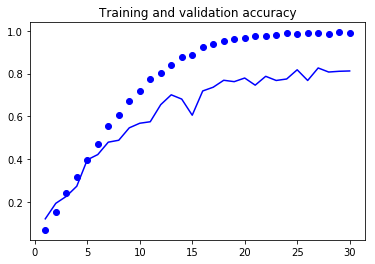

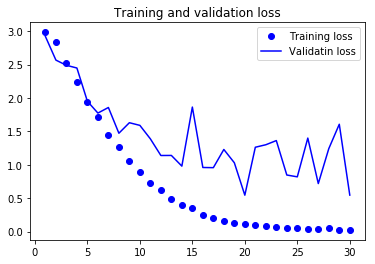

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

#正解率をプロット
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.figure()

#損失値をプロット
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validatin loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## データ拡張
### ImageDataGeneratorを使ってデータ拡張を設定する
* rotation_range…画像をランダムに回転させる（回転範囲0～180）.
* width_shift_range, height_shift_range…画像を水平または垂直にランダムに平行移動させる範囲（幅全体または高さ全体の割合）
* shear_range…等積変形をランダムに適応
* zoom_range…図形の内側をランダムにズーム
* horizontal_flip=True,…画像の半分をランダムに反転（実際の写真のように水平方向の非対称性いついての前提がない場合に重要）
* fill_mode='nearest'…新たに作成されたピクセルを埋めるための戦略（これらのピクセルが見えるようになるのは回転もしくは平行移動の後）

In [9]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

mini_pictures\train\Audi-a3\Audi-a3_30e0fda8deeb_05.jpg


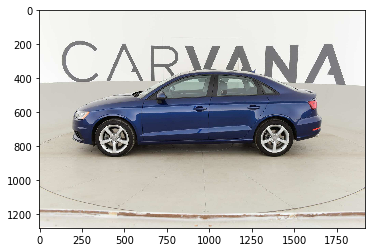

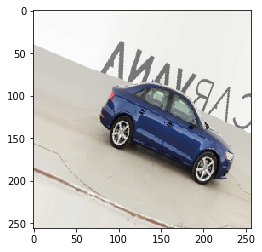

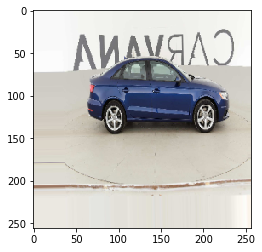

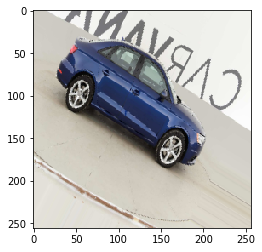

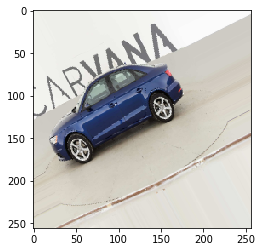

In [14]:
#ランダムに水増しされた訓練画像の表示
%matplotlib inline
from keras.preprocessing import image
import matplotlib.image as mpimg


Audi_a3_dir = os.path.join(train_dir,"Audi-a3")
fnames = [os.path.join(Audi_a3_dir,fname) for fname in os.listdir(Audi_a3_dir)]

# 水増しする画像を選択
image_path = fnames[3]
print(image_path)
# 元の画像を表示
img = mpimg.imread(image_path)
plt.figure()
imgplot = plt.imshow(img)
plt.show()
# 画像読み込み、サイズを変更
img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))

# 形状が(1, 256, 256, 3)のNumpy配列に変形
x = image.img_to_array(img)

# (1, 256, 256, 3)に変形
x = x.reshape((1,) + x.shape)

# ランダムに変換した画像のバッチを生成する
# 無限ループとなるため、何らかのタイミングでbreakする必要あり
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

### ドロップアウトを追加した新しいCNN

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),activation='relu',input_shape=(IMAGE_SIZE, IMAGE_SIZE,3)) )
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(classes_num, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])


In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 256)      

### 拡張ジェネレータを用いてCNNを訓練

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest')

# 検証データは水増しするべきで無いことに注意
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,               #ターゲットディレクトリ
    target_size=(IMAGE_SIZE, IMAGE_SIZE),   #全ての画像を256*256に変換
    batch_size=BATCH_SIZE,           #バッチサイズ
    class_mode='categorical',#損失関数としてcategorical_crossentropyを使用するため,
    classes=classes          #他クラスラベルが必要
    )

validation_generator = test_datagen.flow_from_directory(
    valid_dir,               #ターゲットディレクトリ
    target_size=(IMAGE_SIZE, IMAGE_SIZE),   #全ての画像を256*256に変換
    batch_size=BATCH_SIZE,           #バッチサイズ
    class_mode='categorical',#損失関数としてcategorical_crossentropyを使用するため,
    classes=classes          #他クラスラベルが必要
    )

history = model.fit_generator(
    train_generator,
    steps_per_epoch=NUM_TRAINING//BATCH_SIZE,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=NUM_VALIDATION//BATCH_SIZE
)


Found 1912 images belonging to 20 classes.
Found 657 images belonging to 20 classes.
Epoch 1/30
100/100 [==============================] - 1574s 16s/step - loss: 2.9927 - acc: 0.0568 - val_loss: 2.9350 - val_acc: 0.0656
Epoch 2/30
100/100 [==============================] - 1609s 16s/step - loss: 2.9737 - acc: 0.0692 - val_loss: 2.8283 - val_acc: 0.1127
Epoch 3/30
100/100 [==============================] - 1271s 13s/step - loss: 2.9234 - acc: 0.0857 - val_loss: 2.7123 - val_acc: 0.1241
Epoch 4/30
100/100 [==============================] - 962s 10s/step - loss: 2.8804 - acc: 0.0930 - val_loss: 3.0100 - val_acc: 0.1592
Epoch 5/30
100/100 [==============================] - 999s 10s/step - loss: 2.8349 - acc: 0.1222 - val_loss: 2.8040 - val_acc: 0.1548
Epoch 6/30
100/100 [==============================] - 1052s 11s/step - loss: 2.7950 - acc: 0.1244 - val_loss: 2.8835 - val_acc: 0.1704
Epoch 7/30
100/100 [==============================] - 946s 9s/step - loss: 2.7460 - acc: 0.1322 - val_loss:

In [18]:
model.save('simple_cnn_model_mini_2.h5')

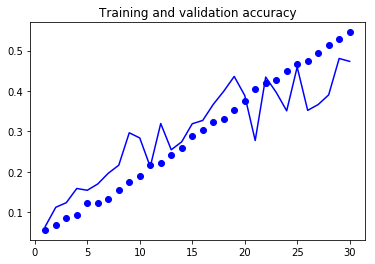

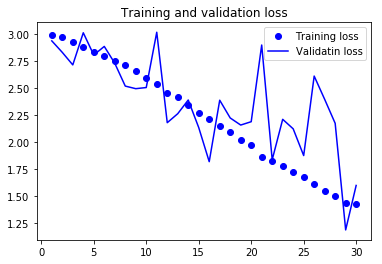

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

#正解率をプロット
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.figure()

#損失値をプロット
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validatin loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()